In [1]:
# source: https://softhints.com/merge-multiple-json-files-pandas-dataframe/
import numpy as np
import pandas as pd
import glob, os, json

json_dir = './data'
dir_list = glob.glob(os.path.join(json_dir, 'search_*'))

In [2]:
data_list = [] # list of dicts
text_list = []
for dir in dir_list:
    file_list = glob.glob(os.path.join(dir, '*.json'))
    result_count = 0
    temp = []
    name = ""
    for file in file_list:
        f = open(file) # file is a path to a json file
        js = json.load(f)
        name = file.split('/')[-2].split('search_')[-1]
        result_count = result_count + js['meta']['result_count']
        temp = np.concatenate((temp, js['data']))
        
        for d in js['data']:
            text_list.append(d['text'])
        
        f.close()
    data_list.append({'name': name, 'result_count': result_count, 'data': temp})


In [3]:
data = pd.DataFrame(data_list)
print(data.head())
print(f'data: {data.shape}')

                   name  result_count  \
0                                   0   
1  Leon Deandre Simpson             1   
2                                   0   
3                                   0   
4                                   0   

                                                data  
0                                                 []  
1  [{'text': 'Leon Deandre Simpson, 39 : #IHateTi...  
2                                                 []  
3                                                 []  
4                                                 []  
data: (5333, 3)


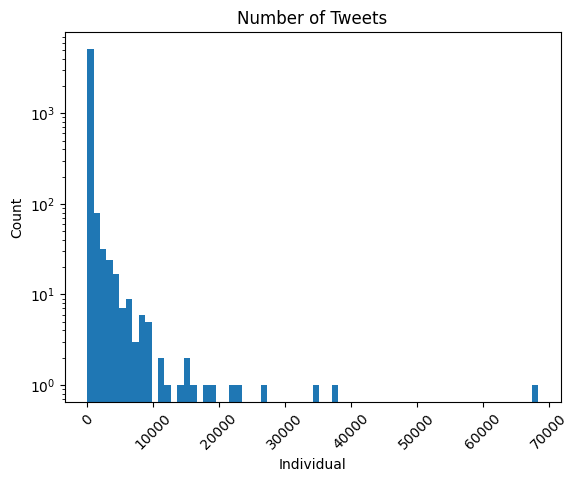

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Number of Tweets')
plt.yscale('log')
plt.hist(data['result_count'], bins=70)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Individual')
plt.show()

In [5]:
data[(data['result_count'] > 3) & (data['result_count'] < 5)]

,name,result_count,data
8,Antonio Centeno Rodriguez,4,"[{'id': '1183531100062306304', 'edit_history_t..."
162,Ernesto Ramos Jimenez,4,"[{'created_at': '2020-11-21T18:32:04.000Z', 'e..."
325,Emerson Arnold,4,"[{'created_at': '2021-07-07T12:31:39.000Z', 'i..."
387,Omar Enrique Garcia,4,[{'text': 'RT @dimanche1948: Si en realidad la...
469,Dennis Todd Rogers,4,"[{'author_id': '17685447', 'text': 'Man armed ..."
...,...,...,...
4990,Jaime Garcia Jr,4,"[{'id': '1017440979513757696', 'created_at': '..."
5008,Anthony Xavier Jackson,4,"[{'id': '1465427785749450753', 'edit_history_t..."
5026,Jonathan Echevarria,4,"[{'text': 'RT @ProfHasanErkek: Şiirlerim, Ada ..."
5217,Alfred Longoria,4,"[{'created_at': '2016-01-21T20:39:45.000Z', 'a..."


In [6]:
data[data['result_count'] > 10000]

,name,result_count,data
494,Na Li,22102,"[{'created_at': '2016-07-17T19:10:52.000Z', 'a..."
621,Jose Leon,11216,"[{'created_at': '2019-03-30T02:26:15.000Z', 'a..."
691,Anthony Davis,37630,"[{'created_at': '2021-09-20T23:04:59.000Z', 'a..."
937,Jose Luis Sanchez,11132,[{'text': 'RT @SportsCenter: Why We Love Sport...
1186,Daniel Garcia,16370,"[{'author_id': '43698461', 'text': 'RT @Danspl..."
1490,Daniel Ramirez,15500,"[{'created_at': '2019-01-16T17:38:49.000Z', 't..."
1559,Jose Luis Rodriguez,18214,[{'edit_history_tweet_ids': ['1277413765613531...
1829,Gracie Anne Muehlberger,14317,"[{'created_at': '2019-11-16T21:38:22.000Z', 'e..."
2171,David Ordaz Jr,14887,"[{'author_id': '2989293426', 'text': 'RT @ceri..."
3062,Juan Cortez,68385,"[{'id': '1294768154984448002', 'edit_history_t..."


In [10]:
# text_list is a list of strings containing the text of every tweet in the data
text_list[:5]

['Leon Deandre Simpson, 39 : #IHateTimWaterman',
 '@athr9 Rubi Guerra, Renato Rodríguez, Ana Teresa Torres, Antonia Palacios, Teresa de la Parra, Israel Centeno, Ricardo Azuaje, Juan Carlos Méndez Guédez, Martha Kornblith, Manón Kübler, Juan Carlos Chirinos, Ramón Palomares, José Antonio Ramos Sucre, Yolanda Pantin... una lista al azar.',
 'RT @venepoetics: @capa1010 A quick, very incomplete &amp; very personal list:\nTeresa de la Parra, Ifigenia\nJuan Sánchez Peláez, all his poetry…',
 'RT @venepoetics: @capa1010 A quick, very incomplete &amp; very personal list:\nTeresa de la Parra, Ifigenia\nJuan Sánchez Peláez, all his poetry…',
 '@capa1010 A quick, very incomplete &amp; very personal list:\nTeresa de la Parra, Ifigenia\nJuan Sánchez Peláez, all his poetry\nJosé Antonio Ramos Sucre, all his poetry\nRenato Rodríguez, El bonche\nIsrael Centeno, Calletania\nAntonia Palacios, all of her poetry\nRómulo Gallegos, Doña Bárbara\n[...]']

In [4]:
# source: https://towardsdatascience.com/interactive-topic-modeling-with-bertopic-1ea55e7d73d8#:~:text=BERTopic%20is%20a%20topic%20modeling,words%20in%20the%20topic%20descriptions.
from bertopic import BERTopic

# testing: training model with first 100; training with the whole list takes a long time
model = BERTopic(language="multilingual")
topics, probabilities = model.fit_transform(text_list[:100])
model.get_topic_freq().head()

# ignore topic -1 (no topic assigned)


,Topic,Count
0,0,42
1,1,38
2,2,14
3,-1,6


In [7]:
# testing: results
model.get_topic(0)

[('de', 0.11884532671780546),
 ('josé', 0.06501040178010548),
 ('la', 0.06468556418734343),
 ('andrade', 0.05872103878925869),
 ('un', 0.05034009042381003),
 ('co', 0.0471776327761582),
 ('https', 0.0471776327761582),
 ('rt', 0.04717294662906443),
 ('mes', 0.03361966495826741),
 ('10', 0.03361966495826741)]